In [2]:
from typing import List, Optional
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from config import viz_param
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
def make_fig(
        xdata: List, 
        ydata: List, 
        c: List = ["C1", "C2"],
        legend: bool = True,
        legendlabel: Optional[List] = None,
        xlabel=None,
        ylabel=None,
        xlim=None,
        ylim=None,
        xticks=[0, 24, 48, 72, 96, 120],
        xticklabels=["2012-01", "2014-01", "2016-01", "2018-01", "2020-01", "2022-01"],
        yticks=None,
        alpha=1,
        fill_range=False):
    plt.figure(1, figsize=(18, 6))
    if legend:
        if not fill_range:
            for i in range(len(xdata)):
                if len(ydata[i]) != 0:
                    plt.plot(xdata[i], ydata[i].mean(axis=0), label=legendlabel[i], c=c[i], alpha=alpha)
        else:
            for i in range(len(xdata)):
                if len(ydata[i]) != 0:
                    plt.fill_between(xdata[i], ydata[i].mean(axis=0) - ydata[i].std(axis=0), ydata[i].mean(axis=0) + ydata[i].std(axis=0), color=c[i], alpha=alpha, label=legendlabel[i])
    else:
        if not fill_range:
            for i in range(len(xdata)):
                if len(ydata[i]) != 0:
                    plt.plot(xdata[i], ydata[i].mean(axis=0), c=c[i], alpha=alpha)
        else:
            for i in range(len(xdata)):
                if len(ydata[i]) != 0:
                    plt.fill_between(xdata[i], ydata[i].mean(axis=0) - ydata[i].std(axis=0), ydata[i].mean(axis=0) + ydata[i].std(axis=0), color=c[i], alpha=alpha)
    ax = plt.gca()
    for l in ax.get_xticklabels() + ax.get_yticklabels():
        l.set_size(16)
        l.set_family('Arial')
        l.set_weight('bold')
    if legend:
        plt.legend(loc=4, prop=dict(size=16, family='Arial', weight='bold'))    
    ax.set_ylabel(ylabel, fontdict=dict(size=16, family='Arial', weight='bold'))
    ax.set_xlabel(xlabel, fontdict=dict(size=16, family='Arial', weight='bold'))
    ax.set_xticks(xticks)
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticklabels, rotation=45)
    ax.grid(ls='--', color='k', lw=0.5)
    plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95)
    # plt.show()

### Make figures for vi

/tmp/ipykernel_16783/1304354754.py:31: RuntimeWarning: Mean of empty slice.
  xdata=[range(0, len(irri_vi.mean(axis=0))), range(0, len(rf_vi.mean(axis=0)))],
/media/workspace/linchenxi/home/satellite-platform/venv/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


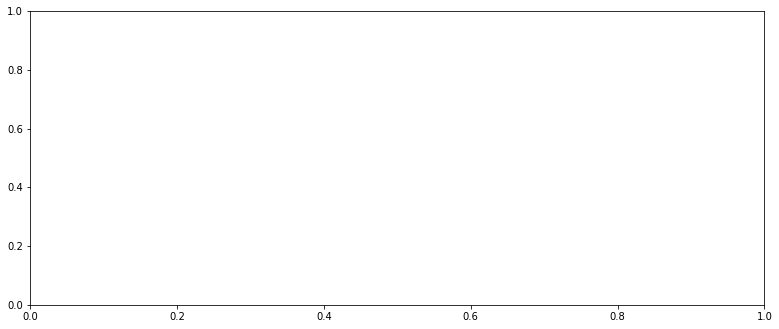

In [11]:
root_dir =  f"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis"
vi = "NDvi" 
for region in ["Guercif", "Fes", "Taza", "Taounate", "Sefrou", "Yacoub"]:
    samples = pd.DataFrame(data=[])
    for year in range(2012, 2023):
        new_name = {f"{vi}_{i}":f"{vi}_{i+(year-2012)*12}" for i in range(1, 13)}
        try:
            irri = pd.read_csv(os.path.join(root_dir, f"{vi}", f"{region}_{vi}_irri_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]]
        except:
            irri = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)])
        irri.rename(columns=new_name, inplace=True)
        irri = irri.fillna(0)
        try:
            rf = pd.read_csv(os.path.join(root_dir, f"{vi}", f"{region}_{vi}_rf_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]]
        except:        
            rf = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 12)])
        rf.rename(columns=new_name, inplace=True)
        rf = rf.fillna(0)
        if year == 2012:
            irri["class"] = 0
            rf["class"] = 1
        combined = pd.concat([irri, rf], axis=0)
        samples = pd.concat([samples, combined], axis=1)
    irri_vi = samples[samples["class"]==0].drop(columns=["class"]).to_numpy()
    rf_vi = samples[samples["class"]==1].drop(columns=["class"]).to_numpy()
    c = np.array([[230, 75, 53], [77, 187, 213],
     [0, 160, 135], [60, 84, 136],
     [243, 155, 127], [132, 145, 180],
     [145, 209, 194], [126, 97, 72]]) / 255.0
    make_fig(
        xdata=[range(0, len(irri_vi.mean(axis=0))), range(0, len(rf_vi.mean(axis=0)))],
        ydata=[irri_vi, rf_vi],
        legendlabel=["Irrigated Olives", "Rainfed Olives"],
        xlabel=f"{vi}",
        ylabel="Dates",
        ylim=viz_param[vi]["ylim"],
        yticks=viz_param[vi]["yticks"],
        c = c)
    plt.savefig(fr"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis/figures/{region}_{vi}.jpg")
    plt.cla()

### Make figures for precipitation

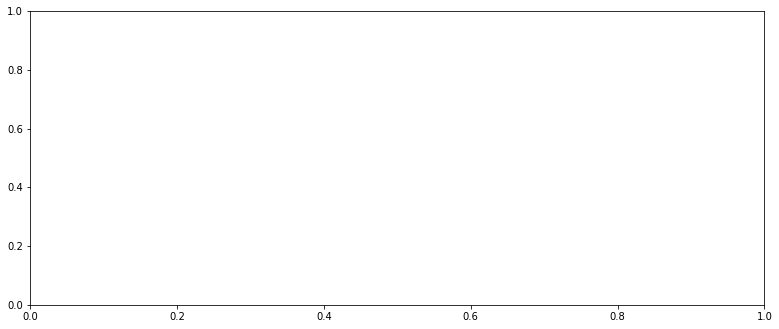

In [19]:
root_dir = f"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis/prec"
for region in ["Guercif", "Fes", "Taza", "Taounate", "Sefrou", "Yacoub"]:
    samples = pd.DataFrame(data=[])
    for year in range(2012, 2023):
        new_name = {f"prec_{i}":f"prec_{i+(year-2012)*12}" for i in range(1, 13)}
        try:
            prec = pd.read_csv(os.path.join(root_dir, f"{region}_prec_{year}.csv"))[[f"prec_{i}" for i in range(1, 13)]]
        except:
            prec = pd.DataFrame(data=[], columns=[f"prec_{i}" for i in range(1, 13)])
        prec.rename(columns=new_name, inplace=True)
        prec = prec.fillna(0)
        samples = pd.concat([samples, prec], axis=1)
    test = samples.sum(axis=0).to_numpy()
    make_fig(
        xdata=[range(0, 132)],
        ydata=[samples],
        legendlabel=["Precipitation"],
        xlabel="Precipitation",
        ylabel="Dates",
        ylim=(0, 100),
        yticks=[0, 20, 40, 60, 80, 100])
    plt.savefig(f"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis/figures/{region}_prec.jpg")
    plt.cla()

### Random Forest

#### 1. Concatnate variables

In [ ]:
root_dir =  f"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis"
samples = pd.DataFrame(data=[])
for year in range(2012, 2023):
    combined_vi = pd.DataFrame(data=[])
    for vi in ["NDvi", "Evi", "CIG", "LSWI", "OSAvi"]:
        new_name = {f"{vi}_{i}":f"{vi}_{i+(year-2012)*12}" for i in range(1, 13)}
        try:
            if year == 2012 and vi == "NDvi":
                irri = pd.read_csv(os.path.join(root_dir, f"{vi}", f"all_{vi}_irri_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]+["FIELD_ID"]]
            else:
                irri = pd.read_csv(os.path.join(root_dir, f"{vi}", f"all_{vi}_irri_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]]
        except:
            irri = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)])
        irri.rename(columns=new_name, inplace=True)
        irri.fillna(method="ffill", inplace=True)
        try:
            if year == 2012 and vi == "NDvi":
                rf = pd.read_csv(os.path.join(root_dir, f"{vi}", f"all_{vi}_rf_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]+["FIELD_ID"]]
            else:
                rf = pd.read_csv(os.path.join(root_dir, f"{vi}", f"all_{vi}_rf_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]] 
        except:        
            rf = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)])
        rf.rename(columns=new_name, inplace=True)
        rf.fillna(method="ffill", inplace=True)
        if year == 2012 and vi == "NDvi":
            irri["class"] = 0
            rf["class"] = 1
        combined = pd.concat([irri, rf], axis=0)
        combined_vi = pd.concat([combined_vi, combined], axis=1)
    samples = pd.concat([samples, combined_vi], axis=1)
samples = samples.reset_index(drop=True)


#### 2. Split training and testing data

In [ ]:
samples_guercif = samples["FIELD_ID"].str.contains("GUERSIF") # provide samples for irrigation
samples_fes = samples["FIELD_ID"].str.contains("Fes-Nord") # provide samples for irrigation and rainfed
samples_taounate = samples["FIELD_ID"].str.contains("TAOUNATE") 
mask = np.any(np.c_[samples_guercif, samples_fes, samples_taounate], axis=1)
X_train = samples[mask].drop(columns=["class", "FIELD_ID"]).to_numpy()
y_train = samples[mask]["class"].to_numpy()
selected_columns = samples.columns[samples.columns.str.contains("NDVI")]
samples_viz = samples[selected_columns]
# make_fig(
#     xdata=[range(0, 132) for _ in range(4)],
#     ydata=[samples_viz[samples_guercif]] + [samples_viz[samples_guercif]],
#     legendlabel=["irri2rf", "rf_2irri", "irri2irri", "rf2rf"],
#     xlabel="vi",
#     ylabel="Dates",
#     c=["C0", "C1", "C2", "C3"],
#     ylim=(0, 1),
#     yticks=[0, 0.2, 0.4, 0.6, 0.8, 1], 
#     alpha=1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
clf = RandomForestClassifier(max_depth=5, random_state=1)
clf.fit(X_train, y_train)
testing_region = ["Fes", 
               "Yacoub",
               "Sefrou",
               "Taza",
               "Taounate",
               "Guercif"
               ]
for region in testing_region:
    testing_samples = pd.DataFrame(data=[])
    for year in range(2012, 2023):
        combined_vi = pd.DataFrame(data=[])
        for vi in ["NDvi", "Evi", "CIG", "LSWI", "OSAvi"]:
            new_name = {f"{vi}_{i}":f"{vi}_{i+(year-2012)*12}" for i in range(1, 13)}
            try:
                irri = pd.read_csv(os.path.join(root_dir, f"{vi}", f"{region}_{vi}_irri_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]]
            except:
                irri = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)])
            irri.rename(columns=new_name, inplace=True)
            irri = irri.fillna(0)
            try:
                rf = pd.read_csv(os.path.join(root_dir, f"{vi}", f"{region}_{vi}_rf_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]]
            except:        
                rf = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)])
            rf.rename(columns=new_name, inplace=True)
            rf = rf.fillna(0)
            if year == 2012 and vi == "NDvi":
                irri["class"] = 0
                rf["class"] = 1
            combined = pd.concat([irri, rf], axis=0)
            combined_vi = pd.concat([combined_vi, combined], axis=1)
        testing_samples = pd.concat([testing_samples, combined_vi], axis=1)
    testing_samples = testing_samples.reset_index(drop=True)
    index_test = testing_samples.index
    X_test = testing_samples.drop(columns=["class"]).to_numpy()
    y_test = testing_samples["class"].to_numpy()
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    index_irri_2_rf = testing_samples.index[(np.logical_and(y_test == 0, y_pred == 1))]
    index_rf_2_irri = testing_samples.index[(np.logical_and(y_test == 1, y_pred == 0))]
    index_irri_2_irri = testing_samples.index[(np.logical_and(y_test == 0, y_pred == 0))]
    index_rf_2_rf = testing_samples.index[(np.logical_and(y_test == 1, y_pred == 1))]
    for vi in ["NDvi", "Evi", "LSWI", "OSAvi", "CIG"]:
        selected_columns = testing_samples.columns[testing_samples.columns.str.contains(vi)]
        samples_viz = testing_samples[selected_columns]
        make_fig(
            xdata=[range(0, 132) for _ in range(4)],
            ydata=[np.array([samples_viz.loc[i] for i in index_irri_2_rf]), np.array([samples_viz.loc[i] for i in index_rf_2_irri]),
            np.array([samples_viz.loc[i] for i in index_irri_2_irri]), np.array([samples_viz.loc[i] for i in index_rf_2_rf])],
            legendlabel=["irri2rf", "rf2irri", "irri2irri", "rf2rf"],
            # ydata=[np.array([samples_viz.loc[i] for i in index_irri_2_rf]), np.array([samples_viz.loc[i] for i in index_rf_2_irri])],
            # legendlabel=["irri2rf", "rf2irri"],
            fill_range=False,
            xlabel=vi,
            ylabel="Dates",
            c=["C0", "C1", "C2", "C3"],
            ylim=(viz_param[vi]["ylim"][0], viz_param[vi]["ylim"][1]),
            yticks=viz_param[vi]["yticks"], 
            alpha=1)
        plt.savefig(fr"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis/figures/{region}_{vi}_mean.jpg")
        plt.cla()

In [ ]:
fi = clf.feature_importances_
fn = samples.drop(columns=["class", "FIELD_ID"]).columns
sorted_fi = np.argsort(fi)[-40:]
fn[sorted_fi]

In [ ]:

X_train = samples[mask].drop(columns=["class", "FIELD_ID"])[fn[sorted_fi]].to_numpy()
y_train = samples[mask]["class"].to_numpy()
new_clf = RandomForestClassifier(max_depth=5, random_state=1)
new_clf.fit(X_train, y_train)
testing_region = ["Fes", 
               "Yacoub",
               "Sefrou",
               "Taza",
               "Taounate",
               "Guercif"
               ]
for region in testing_region:
    testing_samples = pd.DataFrame(data=[])
    for year in range(2012, 2023):
        combined_vi = pd.DataFrame(data=[])
        for vi in ["NDvi", "Evi", "CIG", "LSWI", "OSAvi"]:
            new_name = {f"{vi}_{i}":f"{vi}_{i+(year-2012)*12}" for i in range(1, 13)}
            try:
                irri = pd.read_csv(os.path.join(root_dir, f"{vi}", f"{region}_{vi}_irri_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]]
            except:
                irri = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)])
            irri.rename(columns=new_name, inplace=True)
            irri = irri.fillna(0)
            try:
                rf = pd.read_csv(os.path.join(root_dir, f"{vi}", f"{region}_{vi}_rf_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]]
            except:        
                rf = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)])
            rf.rename(columns=new_name, inplace=True)
            rf = rf.fillna(0)
            if year == 2012 and vi == "NDVI":
                irri["class"] = 0
                rf["class"] = 1
            combined = pd.concat([irri, rf], axis=0)
            combined_vi = pd.concat([combined_vi, combined], axis=1)
        testing_samples = pd.concat([testing_samples, combined_vi], axis=1)
    testing_samples = testing_samples.reset_index(drop=True)
    index_test = testing_samples.index
    X_test = testing_samples.drop(columns=["class"])[fn[sorted_fi]].to_numpy()
    y_test = testing_samples["class"].to_numpy()
    y_pred = new_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print (region, cm)

### Compare vi of all irrigated fields 

/tmp/ipykernel_55173/610663955.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  f"{year}_{vi}_ratio": combined.max(axis=1) / prec.sum(axis=1),
/tmp/ipykernel_55173/610663955.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  f"{year}_{vi}_ratio": combined.max(axis=1) / prec.sum(axis=1),
/tmp/ipykernel_55173/610663955.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  f"{year}_{vi}_ratio": combined.max(axis=1) / prec.sum(axis=1),
/tmp/ipykernel_55173/610663955.py:29: FutureWarni

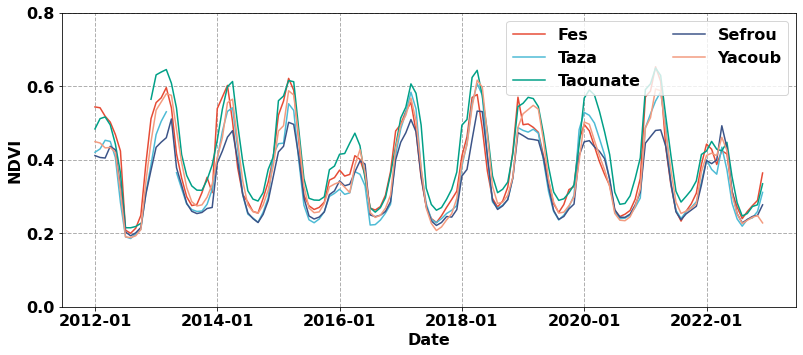

In [5]:
root_dir =  f"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis"
vi = "NDVI" 
for idx, region in enumerate(["Fes", "Taza", "Taounate", "Sefrou", "Yacoub"]):
    samples = pd.DataFrame(data=[])
    for year in range(2012, 2023):
        combined_ratio = pd.DataFrame(data=[])
        try:
            prec = pd.read_csv(os.path.join(root_dir, "prec", f"{region}_prec_{year}.csv"))[[f"prec_{i}" for i in range(1, 13)]+["FIELD_ID"]]
        except:
            prec = pd.DataFrame(data=[], columns=[f"prec_{i}" for i in range(1, 13)]+["FIELD_ID"])
        prec.fillna(method="ffill", inplace=True)
        # to make sure that precipitation align well with vi records
        prec.sort_values(by=["FIELD_ID"], inplace=True) 
        try:
            irri = pd.read_csv(os.path.join(root_dir, f"{vi}", f"{region}_{vi}_irri_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]+["FIELD_ID"]]
        except:
            irri = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)]+["FIELD_ID"])
        irri.fillna(method="ffill", inplace=True)
        try:
            rf = pd.read_csv(os.path.join(root_dir, f"{vi}", f"{region}_{vi}_rf_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]+["FIELD_ID"]]
        except:        
            rf = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)]+["FIELD_ID"])
        rf.fillna(method="ffill", inplace=True)
        if year == 2012:
            irri["class"] = 0
            rf["class"] = 1
        combined = pd.concat([irri, rf], axis=0).reset_index(drop=True)
        ratio = pd.DataFrame({
            f"{year}_{vi}_ratio": combined.max(axis=1) / prec.sum(axis=1), 
            })
        if year == 2012:
            combined_ratio = pd.concat([combined_ratio, ratio, combined["class"], combined["FIELD_ID"]], axis=1)
        else:
            combined_ratio = pd.concat([combined_ratio, ratio], axis=1)
        samples = pd.concat([samples, combined], axis=1)
    irri_vi = samples[samples["class"]==0].drop(columns=["class", "FIELD_ID"]).to_numpy()
    rf_vi = samples[samples["class"]==1].drop(columns=["class", "FIELD_ID"]).to_numpy()
    c = np.array([[230, 75, 53], [77, 187, 213],
     [0, 160, 135], [60, 84, 136],
     [243, 155, 127], [132, 145, 180],
     [145, 209, 194], [126, 97, 72]]) / 255.0
    plt.figure(1, figsize=(12, 6))
    plt.plot(range(0, len(rf_vi.mean(axis=0))), rf_vi.mean(axis=0), label=region, c=c[idx])
    ax = plt.gca()
    for l in ax.get_xticklabels() + ax.get_yticklabels():
        l.set_size(16)
        l.set_family('Arial')
        l.set_weight('bold')
    plt.legend(loc=1, prop=dict(size=16, family='Arial', weight='bold'), ncol=2)    
    ax.set_ylabel(vi, fontdict=dict(size=16, family='Arial', weight='bold'))
    ax.set_xlabel("Date", fontdict=dict(size=16, family='Arial', weight='bold'))
    # ax.set_xticks([0, 3, 6, 9])
    # ax.set_xticklabels([2012, 2015, 2018, 2021])
    ax.set_xticks([0, 24, 48, 72, 96, 120])
    ax.set_ylim(viz_param[vi]["ylim"][0], viz_param[vi]["ylim"][1])
    ax.set_yticks(viz_param[vi]["yticks"])
    # ax.set_ylim(-0.1, 1.3)
    # ax.set_yticks([0, 0.4, 0.8, 1.2])
    ax.set_xticklabels(["2012-01", "2014-01", "2016-01", "2018-01", "2020-01", "2022-01"])
    plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95)
    # plt.savefig(fr"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis/figures/{region}_{vi}.jpg")
    # plt.cla()í
plt.grid(ls="--", lw=1)
plt.savefig(fr"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis/figures/rf_compare_{vi}.jpg")

### classification using samples outside Guercif

In [ ]:
samples_guercif = samples["FIELD_ID"].str.contains("GUERSIF") # provide samples for irrigation and rainfed
mask = samples_guercif
samples_filtered = samples[~mask]
train_rf = np.random.choice(samples_filtered[samples_filtered["class"] == 1].index, 40, replace=False)
train_irri = np.random.choice(samples_filtered[samples_filtered["class"] == 0].index, 30, replace=False)
test_rf = np.setdiff1d(samples_filtered[samples_filtered["class"] == 1].index, train_rf)
test_irri = np.setdiff1d(samples_filtered[samples_filtered["class"] == 0].index, train_irri)
# np.concatenate([index_rf, index_irri])
X_train = samples_filtered.loc[np.concatenate([train_rf, train_irri])].drop(columns=["class", "FIELD_ID"]).to_numpy()
y_train = samples_filtered.loc[np.concatenate([train_rf, train_irri])]["class"].to_numpy()
clf = RandomForestClassifier(max_depth=5, random_state=3, class_weight={0:0.66, 1:0.33})
clf.fit(X_train, y_train)
X_test = samples_filtered.loc[np.concatenate([test_rf, test_irri])].drop(columns=["class", "FIELD_ID"]).to_numpy()
y_test = samples_filtered.loc[np.concatenate([test_rf, test_irri])]["class"].to_numpy()
y_pred = clf.predict(X_test)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print ((y_pred == y_test).mean())

### Explore ratio of annual vi and precipitation

In [3]:
root_dir =  f"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis"
samples = pd.DataFrame(data=[])
for year in range(2012, 2023):
    combined_ratio = pd.DataFrame(data=[])
    try:
        prec = pd.read_csv(os.path.join(root_dir, "prec", f"all_prec_{year}.csv"))[[f"prec_{i}" for i in range(1, 13)]+["FIELD_ID"]]
    except:
        prec = pd.DataFrame(data=[], columns=[f"prec_{i}" for i in range(1, 13)]+["FIELD_ID"])
    prec.fillna(method="ffill", inplace=True)
    prec.sort_values(by=["FIELD_ID"], inplace=True)
    for vi in ["NDVI", "EVI", "CIG", "LSWI", "OSAVI"]:
        try:
            if year == 2012 and vi == "NDvi":
                irri = pd.read_csv(os.path.join(root_dir, f"{vi}", f"all_{vi}_irri_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]+["FIELD_ID"]]
            else:
                irri = pd.read_csv(os.path.join(root_dir, f"{vi}", f"all_{vi}_irri_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]+["FIELD_ID"]]
        except:
            irri = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)+["FIELD_ID"]])
        irri.fillna(method="ffill", inplace=True)
        try:
            if year == 2012 and vi == "NDvi":
                rf = pd.read_csv(os.path.join(root_dir, f"{vi}", f"all_{vi}_rf_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]+["FIELD_ID"]]
            else:
                rf = pd.read_csv(os.path.join(root_dir, f"{vi}", f"all_{vi}_rf_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]+["FIELD_ID"]] 
        except:        
            rf = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)+["FIELD_ID"]])
        rf.fillna(method="ffill", inplace=True)
        if year == 2012 and vi == "NDVI":
            irri["class"] = 0
            rf["class"] = 1
        combined = pd.concat([irri, rf], axis=0).reset_index(drop=True)
        combined.sort_values(by=["FIELD_ID"])
        ratio = pd.DataFrame({
            f"{year}_{vi}_ratio": combined.max(axis=1) / prec.sum(axis=1), 
            # f"{year}_{vi}_max": combined.max(axis=1)
            })
        if year == 2012 and vi == "NDVI":
            combined_ratio = pd.concat([combined_ratio, ratio, combined["class"], combined["FIELD_ID"]], axis=1)
        else:
            combined_ratio = pd.concat([combined_ratio, ratio], axis=1)
    samples = pd.concat([samples, combined_ratio], axis=1)


/tmp/ipykernel_40322/2283525946.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  f"{year}_{vi}_ratio": combined.max(axis=1) / prec.sum(axis=1),
/tmp/ipykernel_40322/2283525946.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  f"{year}_{vi}_ratio": combined.max(axis=1) / prec.sum(axis=1),
/tmp/ipykernel_40322/2283525946.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  f"{year}_{vi}_ratio": combined.max(axis=1) / prec.sum(axis=1),
/tmp/ipykernel_40322/2283525946.py:34: FutureW

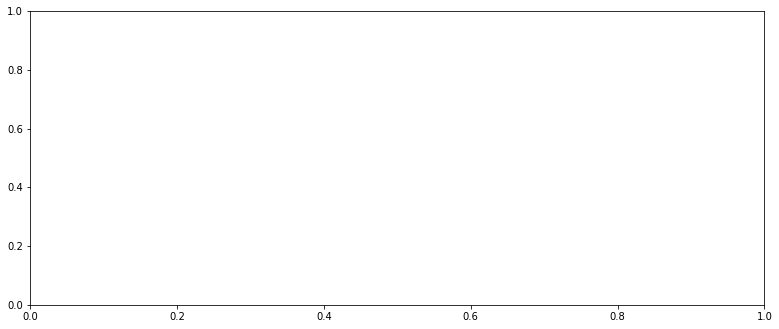

In [10]:
vi = "NDVI"
samples_guercif = samples["FIELD_ID"].str.contains("GUERSIF")
mask = samples_guercif
samples = samples[~mask]
selected_columns = samples.columns[samples.columns.str.contains(vi)]
samples_viz = samples[selected_columns]
irri_vi = samples[samples["class"]==0].drop(columns=["class", "FIELD_ID"])[selected_columns].to_numpy()
rf_vi = samples[samples["class"]==1].drop(columns=["class", "FIELD_ID"])[selected_columns].to_numpy()
c = np.array([[230, 75, 53], [77, 187, 213],
     [0, 160, 135], [60, 84, 136],
     [243, 155, 127], [132, 145, 180],
     [145, 209, 194], [126, 97, 72]]) / 255.0
make_fig(
    xdata=[range(0, len(irri_vi.mean(axis=0))), range(0, len(rf_vi.mean(axis=0)))],
    ydata=[irri_vi, rf_vi],
    legendlabel=["Irrigated Olives", "Rainfed Olives"],
    ylabel=f"{vi}",
    xlabel="Dates",
    ylim=viz_param[vi]["ylim_ratio"],
    yticks=viz_param[vi]["yticks_ratio"],
    xticks=[0, 3, 6, 9, 12],
    xticklabels=[2012, 2015, 2018, 2021, 2024],
    alpha=1,
    c=c[[0, 1], :])
plt.savefig(fr"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis/figures/{vi}_ratio.jpg")
plt.cla()

In [12]:
samples_guercif = samples["FIELD_ID"].str.contains("GUERSIF") # provide samples for irrigation and rainfed
mask = samples_guercif
samples_filtered = samples[~mask]
np.random.seed(1)
train_rf = np.random.choice(samples_filtered[samples_filtered["class"] == 1].index, 30, replace=False)
train_irri = np.random.choice(samples_filtered[samples_filtered["class"] == 0].index, 30, replace=False)
test_rf = np.setdiff1d(samples_filtered[samples_filtered["class"] == 1].index, train_rf)
test_irri = np.setdiff1d(samples_filtered[samples_filtered["class"] == 0].index, train_irri)
# np.concatenate([index_rf, index_irri])
X_train = samples_filtered.loc[np.concatenate([train_rf, train_irri])].drop(columns=["class", "FIELD_ID"]).to_numpy()
y_train = samples_filtered.loc[np.concatenate([train_rf, train_irri])]["class"].to_numpy()
clf = RandomForestClassifier(max_depth=5, random_state=3, class_weight="balanced")
clf.fit(X_train, y_train)
X_test = samples_filtered.loc[np.concatenate([test_rf, test_irri])].drop(columns=["class", "FIELD_ID"]).to_numpy()
y_test = samples_filtered.loc[np.concatenate([test_rf, test_irri])]["class"].to_numpy()
y_pred = clf.predict(X_test)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print ("IR precision:", cm[0, 0]/(cm[0, 0] + cm[1, 0]))
print ("IR recall:", cm[0, 0]/(cm[0, 0] + cm[0, 1]))
print ("RF precision:", cm[1, 1]/(cm[1, 1] + cm[0, 1]))
print ("RF recall:", cm[1, 1]/(cm[1, 1] + cm[1, 0]))
print ("OA:", (y_pred == y_test).mean())

[[ 22   2]
 [ 32 295]]
IR precision: 0.4074074074074074
IR recall: 0.9166666666666666
RF precision: 0.9932659932659933
RF recall: 0.9021406727828746
OA: 0.9031339031339032
